In [1]:
import numpy as np
import pandas as pd

In [29]:
df = pd.read_csv('fifa21 raw data v2.csv')

c:\users\c_sam\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (76) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [30]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [39]:
# Define a function to remove non-numeric characters and convert to lbs
def clean_and_convert_to_lbs(weight):
    numeric_weight = ''.join(filter(str.isdigit, weight))  # Remove non-numeric characters
    if 'kg' in weight:
        weight_in_lbs = float(numeric_weight) * 2.20462  # 1 kg = 2.20462 lbs
    else:
        weight_in_lbs = float(numeric_weight)
    return weight_in_lbs

# Apply the function to the 'weight' column
df['Weight'] = df['Weight'].apply(clean_and_convert_to_lbs)

In [41]:
df['Weight'] = df['Weight'].round()

In [42]:
df['Weight'].head()

0    159.0
1    183.0
2    192.0
3    154.0
4    150.0
Name: Weight, dtype: float64

In [43]:
def clean_and_convert_to_cms(height):
    if 'cm' in height:
        numeric_height = ''.join(filter(str.isdigit, height))  # Remove non-numeric characters        
        height_in_cm = float(numeric_height)
    else: #this means it is feet and inches so this needs to be converted to cm
        feet, inches = height.split("'")
        feet = int(feet)
        inches = int(inches.strip('"'))
        total_inches = feet * 12 + inches
        height_in_cm = total_inches * 2.54
    return height_in_cm 


# Apply the function to the 'Height' column
df['Height'] = df['Height'].apply(clean_and_convert_to_cms)

In [44]:
df['Height'].head()

0    170.0
1    187.0
2    188.0
3    181.0
4    175.0
Name: Height, dtype: float64

In [45]:
df['Release Clause'].head()

0    €138.4M
1     €75.9M
2    €159.4M
3      €161M
4    €166.5M
Name: Release Clause, dtype: object

In [60]:
# need to remove euro and millions from the release date
def clean_and_convert_to_Millions(showmethemoney):
    numeric_money = float(''.join(filter(str.isdigit, showmethemoney)))  # Remove non-numeric characters        
    money_in_millions = numeric_money * 1000000 
    return money_in_millions

# Apply the function to the 'Release Clause' column
df['Release Clause'] = df['Release Clause'].apply(clean_and_convert_to_Millions)

In [61]:
df['Release Clause'].head()

0    1.384000e+09
1    7.590000e+08
2    1.594000e+09
3    1.610000e+08
4    1.665000e+09
Name: Release Clause, dtype: float64

In [62]:
df['Value'] = df['Value'].apply(clean_and_convert_to_Millions)

In [63]:
df['Value'].head()

0    1.035000e+09
1    6.300000e+07
2    1.200000e+08
3    1.290000e+08
4    1.320000e+08
Name: Value, dtype: float64

In [64]:
# need to remove euro and millions from the release date
def clean_and_convert_k(showmethemoney):
    numeric_money = float(''.join(filter(str.isdigit, showmethemoney)))  # Remove non-numeric characters        
    money_k = numeric_money * 1000 
    return money_k

df['Wage'] = df['Wage'].apply(clean_and_convert_k)

In [65]:
df['Wage'].head()

0    560000.0
1    220000.0
2    125000.0
3    370000.0
4    270000.0
Name: Wage, dtype: float64

In [67]:
df[['Contract_Start', 'Contract_End']] = df['Contract'].str.split('~', expand=True)

In [69]:
df['Contract_End'].head()

0     2021
1     2022
2     2023
3     2023
4     2022
Name: Contract_End, dtype: object

In [70]:
df.to_csv('fifa21_cleaned_dataset')

In [71]:
df.describe()

,ID,Age,↓OVA,POT,Height,Weight,BOV,Value,Wage,Release Clause,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,1.897900e+04,18979.000000,1.897900e+04,...,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,181.200409,165.388535,66.751726,2.622614e+08,128696.770114,2.471188e+08,...,16.217187,16.519627,1595.286949,355.702197,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934
std,27141.054157,4.710520,6.968999,6.114635,6.840192,15.587627,6.747193,2.926659e+08,248274.036187,2.897080e+08,...,17.002239,17.854079,269.874789,40.761117,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883
min,41.000000,16.000000,47.000000,47.000000,155.000000,110.000000,48.000000,0.000000e+00,0.000000,0.000000e+00,...,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,210135.000000,21.000000,61.000000,67.000000,176.000000,154.000000,62.000000,1.600000e+07,2000.000000,1.600000e+07,...,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,232418.000000,25.000000,66.000000,71.000000,181.000000,165.000000,67.000000,1.150000e+08,6000.000000,1.040000e+08,...,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,246922.500000,29.000000,70.000000,75.000000,186.000000,176.000000,71.000000,4.750000e+08,36000.000000,4.290000e+08,...,14.000000,14.000000,1781.000000,384.000000,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000
max,259216.000000,53.000000,93.000000,95.000000,206.000000,243.000000,93.000000,1.855000e+09,950000.000000,2.031000e+09,...,91.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000


In [72]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Density'>

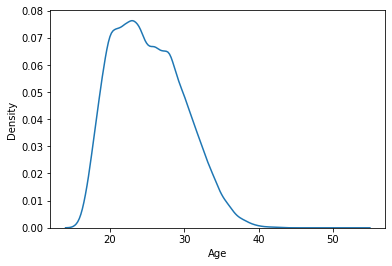

In [73]:
sns.kdeplot(data=df, x=df['Age'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

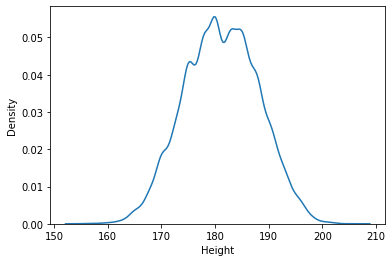

In [74]:
sns.kdeplot(data=df, x=df['Height'])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

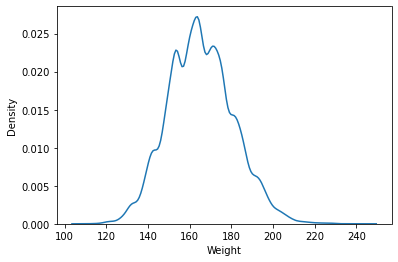

In [75]:
sns.kdeplot(data=df, x=df['Weight'])

In [76]:
df.corr()

,ID,Age,↓OVA,POT,Height,Weight,BOV,Value,Wage,Release Clause,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
ID,1.000000,-0.753413,-0.486968,0.023736,-0.108418,-0.210392,-0.443686,0.081777,0.250265,0.049856,...,-0.123415,-0.110397,-0.291523,-0.434793,0.079109,-0.308248,-0.399298,-0.291203,-0.216042,-0.399517
Age,-0.753413,1.000000,0.466140,-0.269473,0.090268,0.242624,0.401796,-0.046132,-0.214488,-0.021771,...,0.129497,0.117392,0.249822,0.390236,-0.129725,0.265495,0.350054,0.214831,0.223683,0.445806
↓OVA,-0.486968,0.466140,1.000000,0.632166,0.033415,0.148708,0.987149,-0.323855,-0.354880,-0.231367,...,0.013473,0.006018,0.620825,0.845894,0.266494,0.479176,0.698816,0.654745,0.363017,0.572159
POT,0.023736,-0.269473,0.632166,1.000000,-0.009796,-0.024466,0.669677,-0.295049,-0.155989,-0.231776,...,-0.036007,-0.037498,0.382014,0.520473,0.305882,0.275101,0.428741,0.479501,0.188153,0.205002
Height,-0.108418,0.090268,0.033415,-0.009796,1.000000,0.771655,0.022500,0.006699,-0.030347,0.008182,...,0.364423,0.365738,-0.364694,-0.103966,-0.376917,-0.073117,-0.178007,-0.277760,0.080214,0.419814
Weight,-0.210392,0.242624,0.148708,-0.024466,0.771655,1.000000,0.129266,-0.016801,-0.052286,-0.004103,...,0.341340,0.339276,-0.250769,0.015863,-0.326156,0.020082,-0.079769,-0.177549,0.092362,0.510279
BOV,-0.443686,0.401796,0.987149,0.669677,0.022500,0.129266,1.000000,-0.329249,-0.357533,-0.237115,...,-0.039552,-0.047385,0.653336,0.841199,0.274963,0.470838,0.687184,0.648649,0.367787,0.565163
Value,0.081777,-0.046132,-0.323855,-0.295049,0.006699,-0.016801,-0.329249,1.000000,0.114300,0.598518,...,0.000970,0.000905,-0.205103,-0.278032,-0.118166,-0.168172,-0.239403,-0.235354,-0.095991,-0.147603
Wage,0.250265,-0.214488,-0.354880,-0.155989,-0.030347,-0.052286,-0.357533,0.114300,1.000000,0.112487,...,0.041358,0.044669,-0.272946,-0.315929,-0.099415,-0.174162,-0.237661,-0.234855,-0.145563,-0.238162
Release Clause,0.049856,-0.021771,-0.231367,-0.231776,0.008182,-0.004103,-0.237115,0.598518,0.112487,1.000000,...,0.016295,0.017093,-0.154068,-0.196042,-0.082540,-0.120254,-0.167190,-0.172599,-0.066948,-0.098612


In [77]:
df['Nationality'].head()

0    Argentina
1     Portugal
2     Slovenia
3      Belgium
4       Brazil
Name: Nationality, dtype: object

In [81]:
# we are going to create a smaller data frame to create a correaltion heat map
subset_dataframe = df.loc[:, ['ID', 'Name','Nationality','Age','Height','Weight','Contract_Start','Contract_End','Value','Wage','Release Clause','Movement','Agility','Acceleration','Sprint Speed','Reactions','Balance','Power','Jumping','Stamina','Vision','Mentality']]

In [82]:
subset_dataframe.corr()

,ID,Age,Height,Weight,Value,Wage,Release Clause,Movement,Agility,Acceleration,Sprint Speed,Reactions,Balance,Power,Jumping,Stamina,Vision,Mentality
ID,1.000000,-0.753413,-0.108418,-0.210392,0.081777,0.250265,0.049856,-0.038604,-0.059803,0.093328,0.091788,-0.472715,0.019268,-0.310576,-0.206838,-0.101355,-0.254340,-0.252161
Age,-0.753413,1.000000,0.090268,0.242624,-0.046132,-0.214488,-0.021771,-0.022100,-0.012064,-0.142046,-0.135785,0.454699,-0.076881,0.299444,0.204923,0.118090,0.196022,0.226098
Height,-0.108418,0.090268,1.000000,0.771655,0.006699,-0.030347,0.008182,-0.618815,-0.614319,-0.543930,-0.461070,-0.000346,-0.765187,-0.143918,-0.001933,-0.284790,-0.361548,-0.316721
Weight,-0.210392,0.242624,0.771655,1.000000,-0.016801,-0.052286,-0.004103,-0.520358,-0.530371,-0.482150,-0.406967,0.107518,-0.652413,-0.016888,0.068822,-0.217938,-0.271324,-0.222522
Value,0.081777,-0.046132,0.006699,-0.016801,1.000000,0.114300,0.598518,-0.132270,-0.098798,-0.086844,-0.089043,-0.282448,-0.056181,-0.179183,-0.074527,-0.126926,-0.181911,-0.164413
Wage,0.250265,-0.214488,-0.030347,-0.052286,0.114300,1.000000,0.112487,-0.167563,-0.138854,-0.113397,-0.121217,-0.314272,-0.072709,-0.268734,-0.133830,-0.181287,-0.202831,-0.229898
Release Clause,0.049856,-0.021771,0.008182,-0.004103,0.598518,0.112487,1.000000,-0.099939,-0.078060,-0.074737,-0.069339,-0.193435,-0.039992,-0.137260,-0.056655,-0.090936,-0.128848,-0.125651
Movement,-0.038604,-0.022100,-0.618815,-0.520358,-0.132270,-0.167563,-0.099939,1.000000,0.924056,0.936309,0.904567,0.375954,0.838927,0.609734,0.233747,0.662603,0.605439,0.679524
Agility,-0.059803,-0.012064,-0.614319,-0.530371,-0.098798,-0.138854,-0.078060,0.924056,1.000000,0.826565,0.772671,0.279082,0.774322,0.538426,0.176561,0.576392,0.602765,0.610726
Acceleration,0.093328,-0.142046,-0.543930,-0.482150,-0.086844,-0.113397,-0.074737,0.936309,0.826565,1.000000,0.926041,0.191785,0.716052,0.514739,0.187931,0.609475,0.467086,0.570902


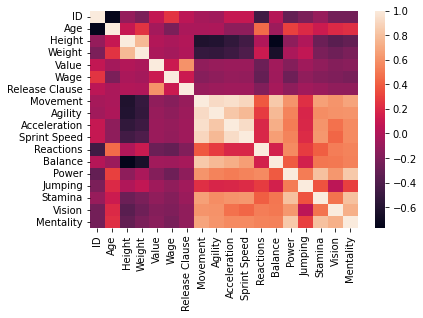

In [84]:
import matplotlib.pyplot as plt
matrix = subset_dataframe.corr().round(2)
sns.heatmap(matrix)
plt.show()

In [85]:
subset_dataframe.isna()

,ID,Name,Nationality,Age,Height,Weight,Contract_Start,Contract_End,Value,Wage,...,Agility,Acceleration,Sprint Speed,Reactions,Balance,Power,Jumping,Stamina,Vision,Mentality
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18975,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18976,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18977,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [87]:
subset_dataframe.nunique()

ID                18979
Name              17920
Nationality         164
Age                  29
Height               62
Weight               56
Contract_Start       45
Contract_End          9
Value               193
Wage                134
Release Clause      832
Movement            331
Agility              81
Acceleration         85
Sprint Speed         84
Reactions            69
Balance              82
Power               288
Jumping              75
Stamina              85
Vision               86
Mentality           351
dtype: int64

In [95]:
subset_dataframe.info()
subset_dataframe['Contract_End'] = subset_dataframe['Contract_End'].astype(str)
subset_dataframe['Contract_Start'] = subset_dataframe['Contract_Start'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              18979 non-null  int64  
 1   Name            18979 non-null  object 
 2   Nationality     18979 non-null  object 
 3   Age             18979 non-null  int64  
 4   Height          18979 non-null  float64
 5   Weight          18979 non-null  float64
 6   Contract_Start  18979 non-null  object 
 7   Contract_End    18979 non-null  object 
 8   Value           18979 non-null  float64
 9   Wage            18979 non-null  float64
 10  Release Clause  18979 non-null  float64
 11  Movement        18979 non-null  int64  
 12  Agility         18979 non-null  int64  
 13  Acceleration    18979 non-null  int64  
 14  Sprint Speed    18979 non-null  int64  
 15  Reactions       18979 non-null  int64  
 16  Balance         18979 non-null  int64  
 17  Power           18979 non-null 

In [88]:
subset_dataframe.to_csv('FIFA_cleaned_smaller_dataset.csv')